# 08 Graphs
__Math 3080: Fundamentals of Data Science__

Reading:
* McKinney, Chapter 9 Plotting and Visualization

Outline:
1. Summary of the different plots we can use
2. Overview of MatplotLib
3. Overview of Seaborn
4. Interactive plots
    * Plotly

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')
#iris = sns.load_dataset('iris')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


-----
## 8.3 Seaborn

<AxesSubplot: xlabel='day', ylabel='count'>

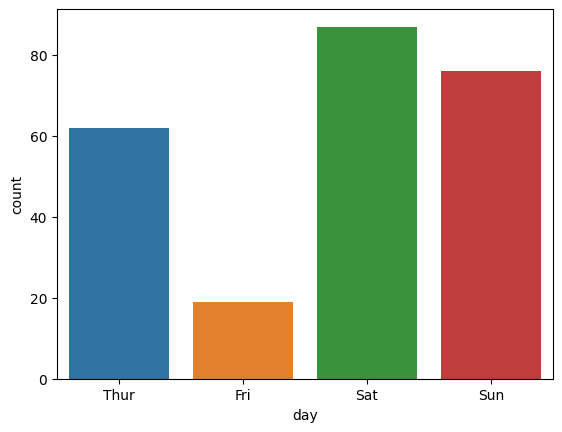

In [4]:
sns.countplot(data=tips, x='day')

Text(0.5, 1.0, 'Number of restaurant visits by gender')

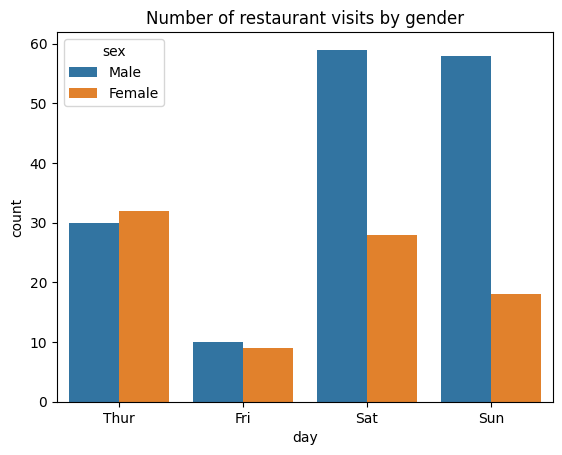

In [5]:
sns.countplot(data=tips, x='day', hue='sex')
plt.title('Number of restaurant visits by gender')

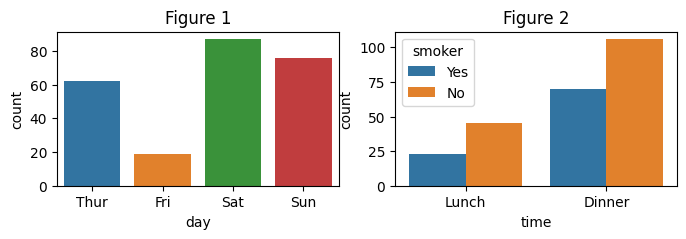

In [11]:
fig, ax = plt.subplots(1,2, figsize=(8,2))

ax[0].set_title('Figure 1')
sns.countplot(data=tips, x='day', ax=ax[0])

ax[1].set_title('Figure 2')
sns.countplot(data=tips, x='time', hue='smoker', ax=ax[1])

plt.show()

/home/meo/.virtualenvs/DataScience/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


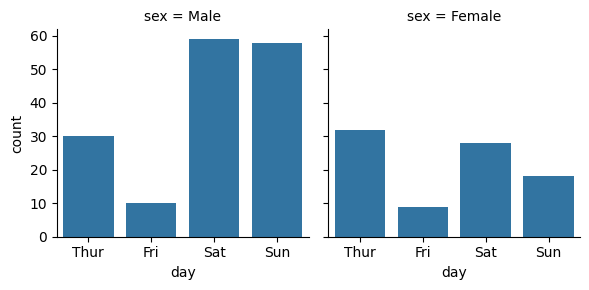

In [12]:
# Multiple Graphs, separated by category
g = sns.FacetGrid(data = tips, col = 'sex')
g.map(sns.countplot, 'day')

/home/meo/.virtualenvs/DataScience/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


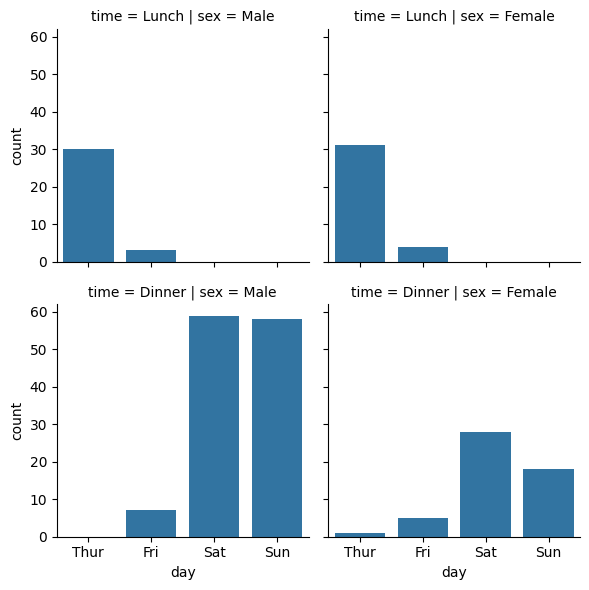

In [13]:
# Multiple Graphs, separated by category
g = sns.FacetGrid(data = tips, col = 'sex', row='time')
g.map(sns.countplot, 'day')

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

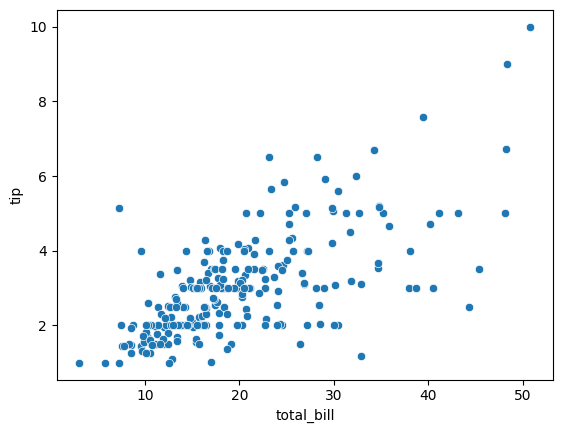

In [14]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

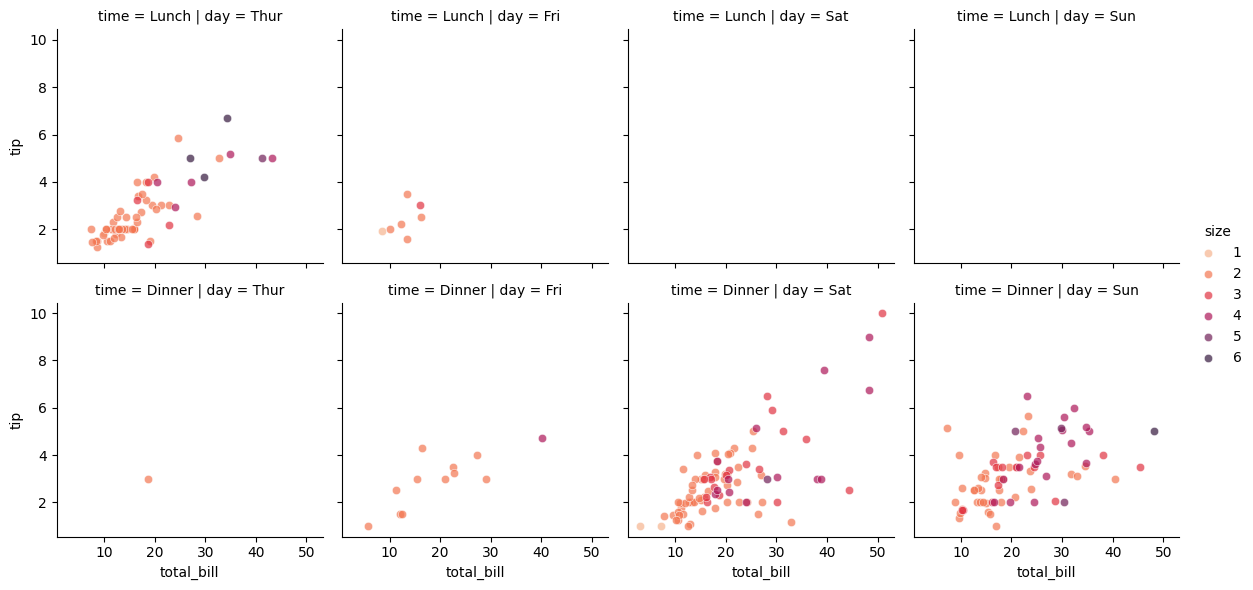

In [25]:
pal = {1:'#cccccc', 2:'#aaaaaa', 3:'#888888', 4:'#666666', 5:'#444444', 6:'#222222'}
g = sns.FacetGrid(tips, col="day", row="time", hue="size", palette='rocket_r')
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

### A note about colors
When choosing colors, it is tempting to choose colors that we like. I have received many figures in assignments where the colors were wild a crazy. Although I have no problem with that (your colors are your own choice), we have to be careful with the colors we choose. Remember that this figure is for others to see, not yourself. So, let's look at a few principles for choosing colors.
* Choose a color scheme that helps specific categories stand out
* With categorical data, choose a scheme where colors vary
* With quantitative data, choose a scheme with a gradual change
* Choose a color scheme that works for colorblindness

A summary of good color choice practices can be found here:
* https://seaborn.pydata.org/tutorial/color_palettes.html

### Quantitative and Distribution Plots
* Histograms
  * can include KDE plots (will be discussed later)
* Scatter Plots
  * Regression Plots
* Rugplot
  * KDE plots (kernel density estimation)
* 2D KDE plots
* Boxplot, Violinplot, Stripplot, swarmplot
* Heatmap and Clustermap

#### Histograms

<AxesSubplot: xlabel='total_bill', ylabel='Count'>

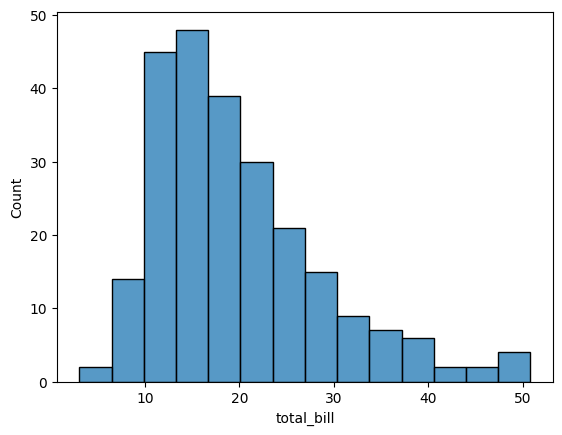

In [26]:
sns.histplot(data=tips, x='total_bill')

<AxesSubplot: xlabel='total_bill', ylabel='Count'>

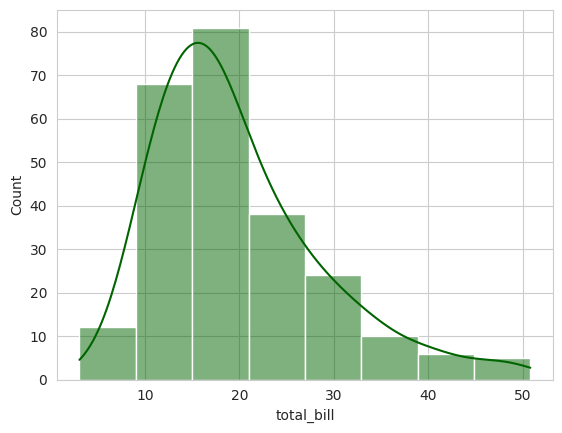

In [32]:
sns.set_style("whitegrid")
sns.histplot(data=tips, x='total_bill',
             kde=True,
             bins=8,
             color='darkgreen')

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

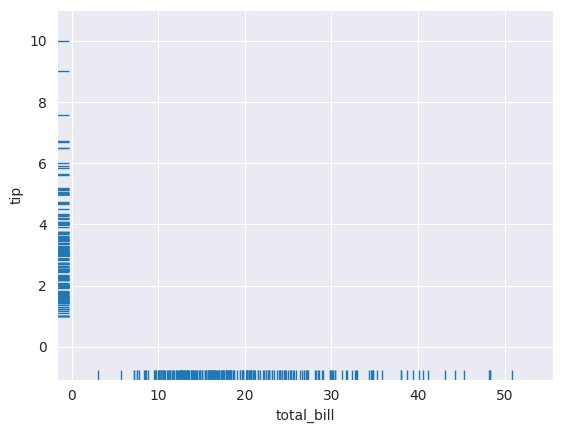

In [41]:
sns.rugplot(data=tips, x='total_bill', y='tip')

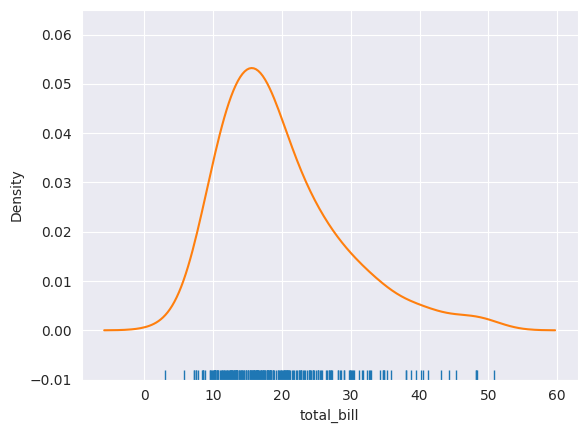

In [42]:
fig, ax = plt.subplots()

sns.rugplot(data=tips, x='total_bill')
sns.kdeplot(data=tips, x='total_bill')

plt.ylim((-0.01,0.065))
plt.show()

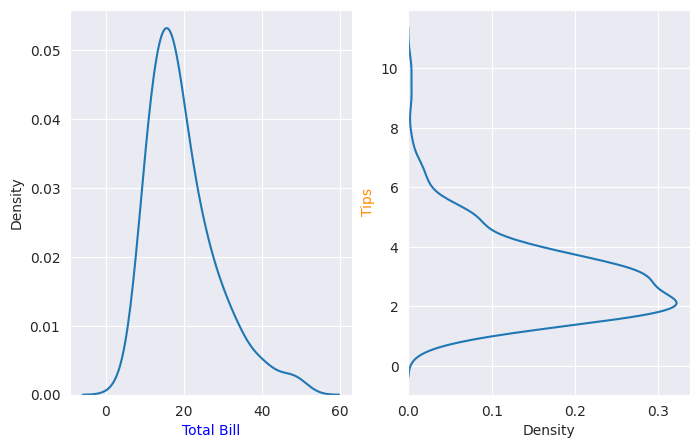

In [43]:
fig, ax = plt.subplots(1,2, figsize=(8,5))

ax[0].set_xlabel('Total Bill', color='blue')
sns.kdeplot(data=tips, x='total_bill', ax=ax[0])

ax[1].set_ylabel('Tips', color='darkorange')
sns.kdeplot(data=tips, y='tip', ax=ax[1])

plt.show()

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

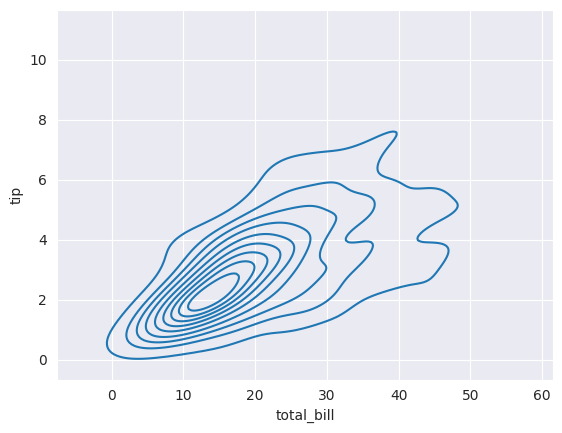

In [44]:
sns.kdeplot(data=tips, x='total_bill', y='tip')

#### Scatterplots

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

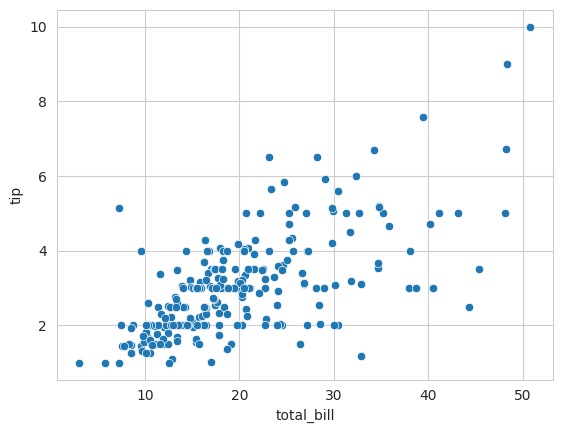

In [33]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

### Multiple plots
* Jointplot: Combines the 2D scatterplot with 1D histograms
* Pairplot: A grid of scatterplots comparing all variables, along with histograms of each variable

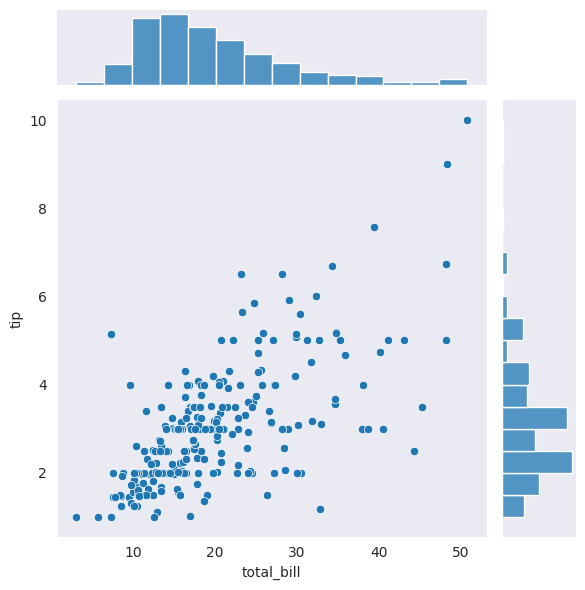

In [34]:
sns.set_style("dark")
sns.jointplot(data=tips, x='total_bill', y='tip')

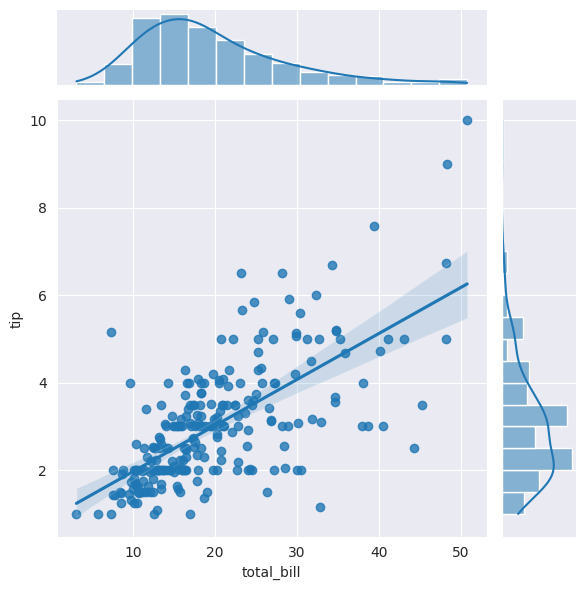

In [35]:
sns.set_style("darkgrid")
sns.jointplot(data=tips, x='total_bill', y='tip',
                kind='reg')

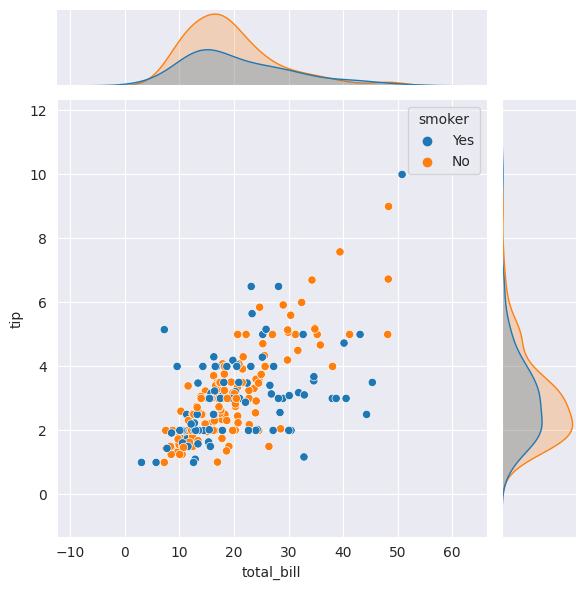

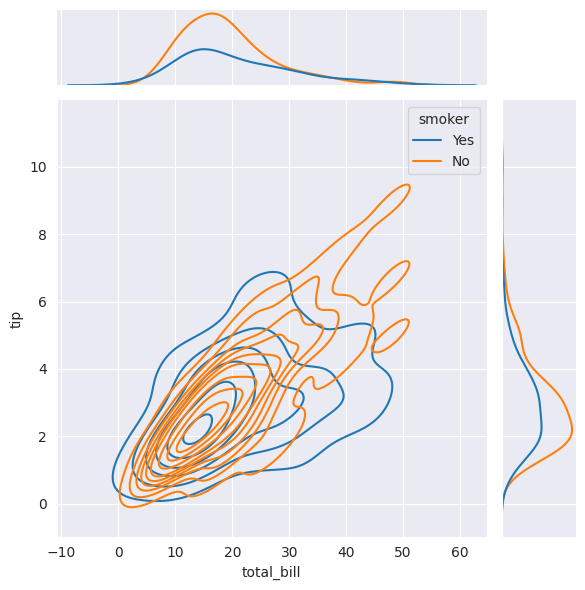

In [39]:
sns.jointplot(data=tips, x='total_bill', y='tip',
                hue='smoker')

sns.jointplot(data=tips, x='total_bill', y='tip',
                kind='kde', hue='smoker')

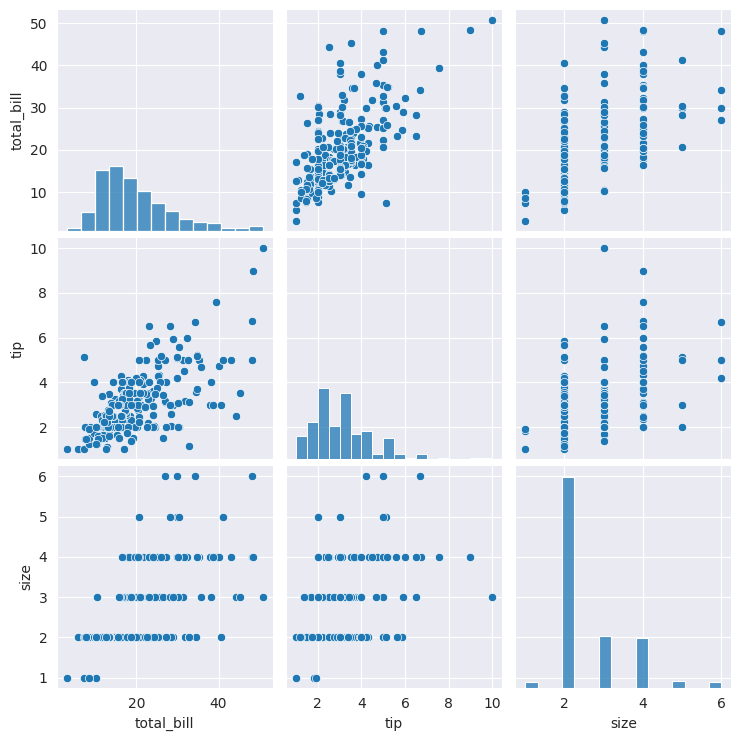

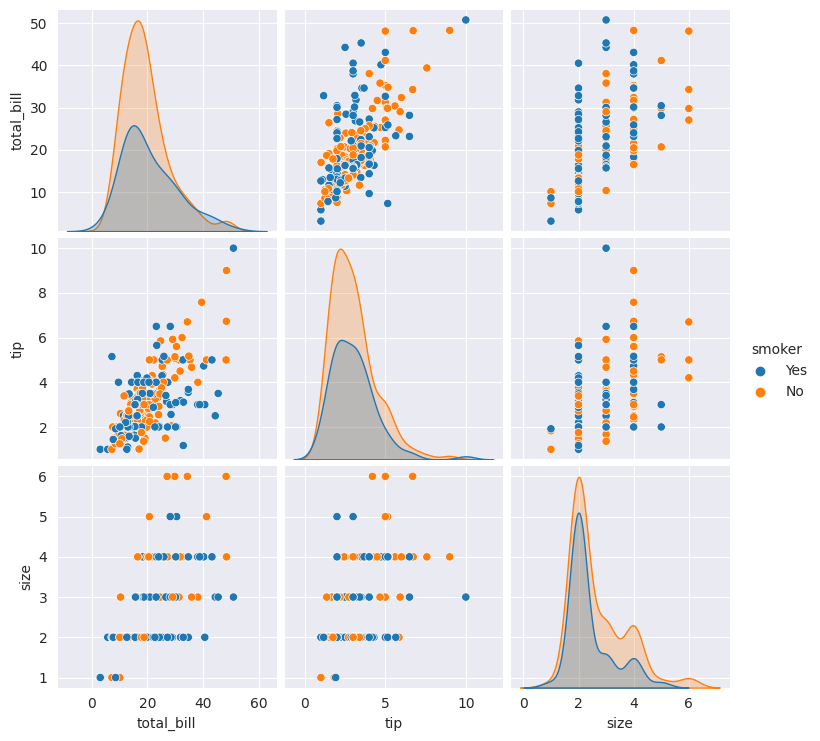

In [40]:
sns.pairplot(data=tips)
sns.pairplot(data=tips, hue='smoker')

AttributeError: 'function' object has no attribute 'set_visible'

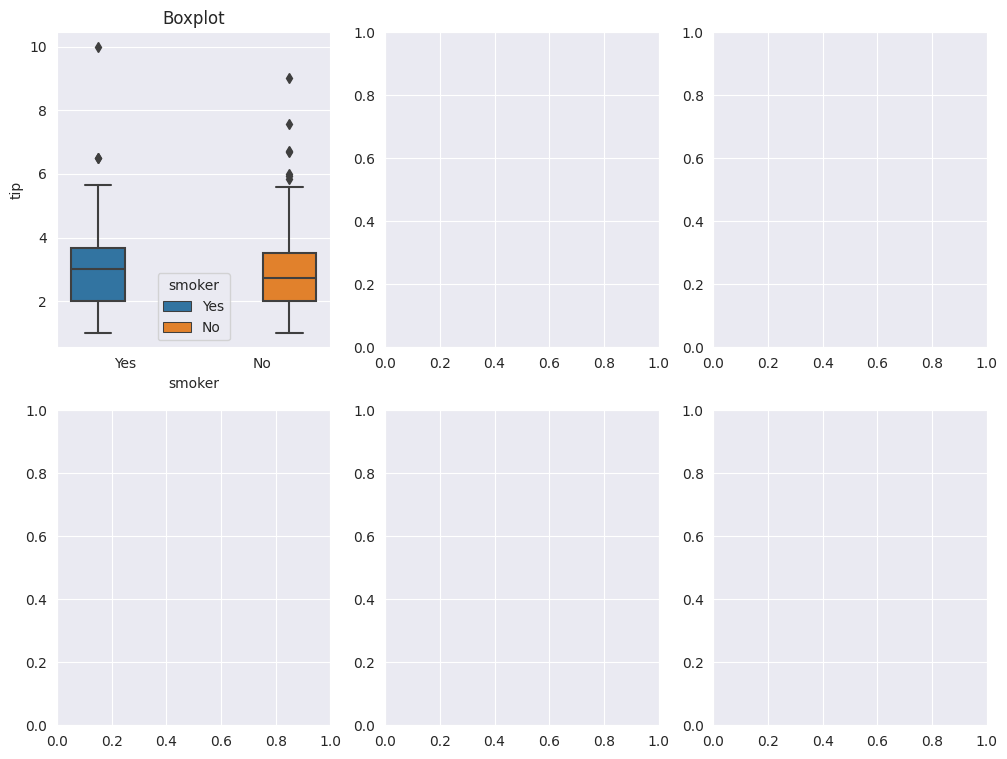

In [120]:
# Boxplot violinplot swarmplot

fig, ax = plt.subplots(2,3, figsize=(12,9))

sns.boxplot(data=tips, x='smoker', y='tip', hue='smoker', ax=ax[0,0])
ax[0,0].set_title('Boxplot')
plt.gca().legend.set_visible(False)

sns.violinplot(data=tips, x='smoker', y='tip', hue='smoker', ax=ax[0,1])
ax[0,1].set_title('Violinplot')
plt.legend([],[], frameon=False)

sns.swarmplot(data=tips, x='smoker', y='tip', hue='smoker', ax=ax[0,2])
ax[0,2].set_title('Swarmplot')
plt.legend([],[], frameon=False)

sns.stripplot(data=tips, x='smoker', y='tip', hue='smoker', ax=ax[1,0])
ax[1,0].set_title('Stripplot')
plt.legend([],[], frameon=False, )

sns.boxplot(data=tips, x='smoker', y='tip', hue='smoker', ax=ax[1,1])
sns.stripplot(data=tips, x='smoker', y='tip', hue='smoker', ax=ax[1,1], color='grey')
ax[1,1].set_title('Boxplot')

plt.show()

### Categorical Plots
* Barplot - displays some value (normally the mean) of some variable by category
* Countplot - displys the number of types some category occurs

In [86]:
tips.groupby('smoker')['tip'].mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

<AxesSubplot: xlabel='smoker', ylabel='tip'>

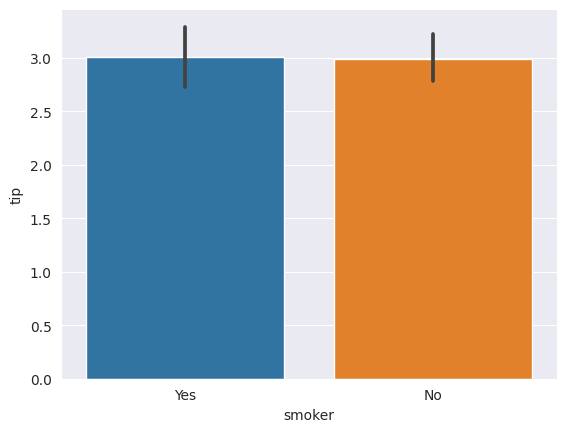

In [117]:
sns.barplot(data=tips, x='smoker', y='tip')

<AxesSubplot: xlabel='smoker', ylabel='count'>

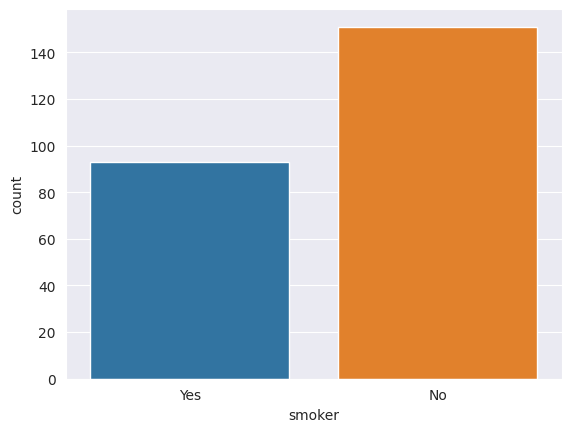

In [60]:
sns.countplot(data=tips, x='smoker')

### Error Bars in Graphs
Many graphs that give a numerical value (such as barplots and lineplots) allow the user to add an error bar. There are 4 basic error bar types:
* “ci” : Confidence Interval (default)
  * Can set to a specific confidence interval using `errorbar=('ci',85)` (default, ci=95)
* “pi” : Percentile Interval 
  * Central 95% of the data - 95% is default
  * Change with `errorbar=('pi',50)`
* “se” : Standard Error {Standard deviation / sqrt(sample size)}
* “sd” : Standard Deviation
  * Default is 1 standard deviation
  * To change, use `errorbar=('sd',n)` where $n$ is the number of desired standard deviations
* None : Removes the errorbar

There are also ways to create your own error bars.

A more detailed description of error bars can be found here:
* https://seaborn.pydata.org/tutorial/error_bars.html

<AxesSubplot: xlabel='smoker', ylabel='tip'>

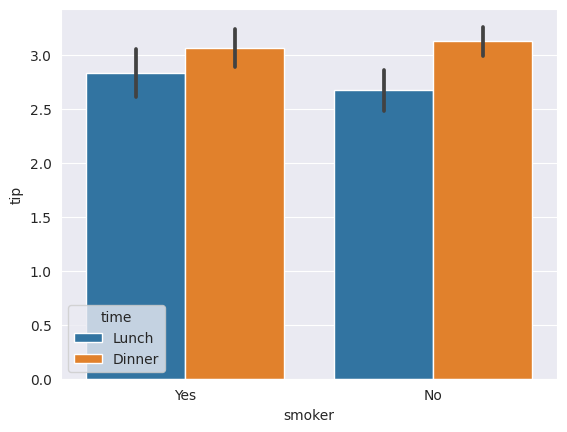

In [78]:
sns.barplot(data=tips, x='smoker', y='tip', hue='time', errorbar='se')

<AxesSubplot: xlabel='smoker', ylabel='tip'>

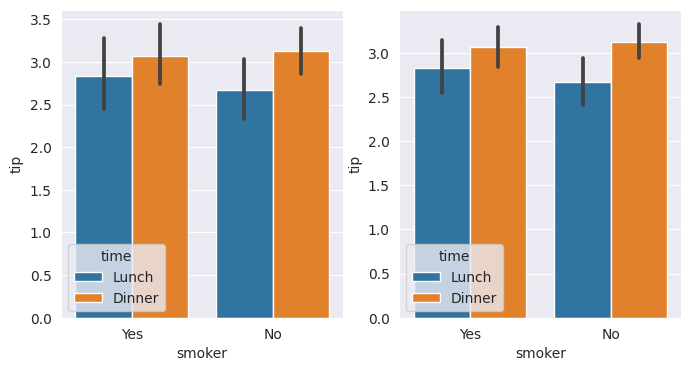

In [83]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

sns.barplot(data=tips, x='smoker', y='tip', hue='time', errorbar='ci', ax=ax[0])
sns.barplot(data=tips, x='smoker', y='tip', hue='time', errorbar=('ci',82), ax=ax[1])